In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
labels = pd.DataFrame(iris.target, columns=["labels"])

In [8]:
data.shape, labels.shape

((150, 4), (150, 1))

In [9]:
data = pd.concat([data, labels], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
pred = pd.DataFrame(dbscan.fit_predict(data), columns=["predict"])
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [14]:
r = pd.concat([data,pred], axis=1)
r.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


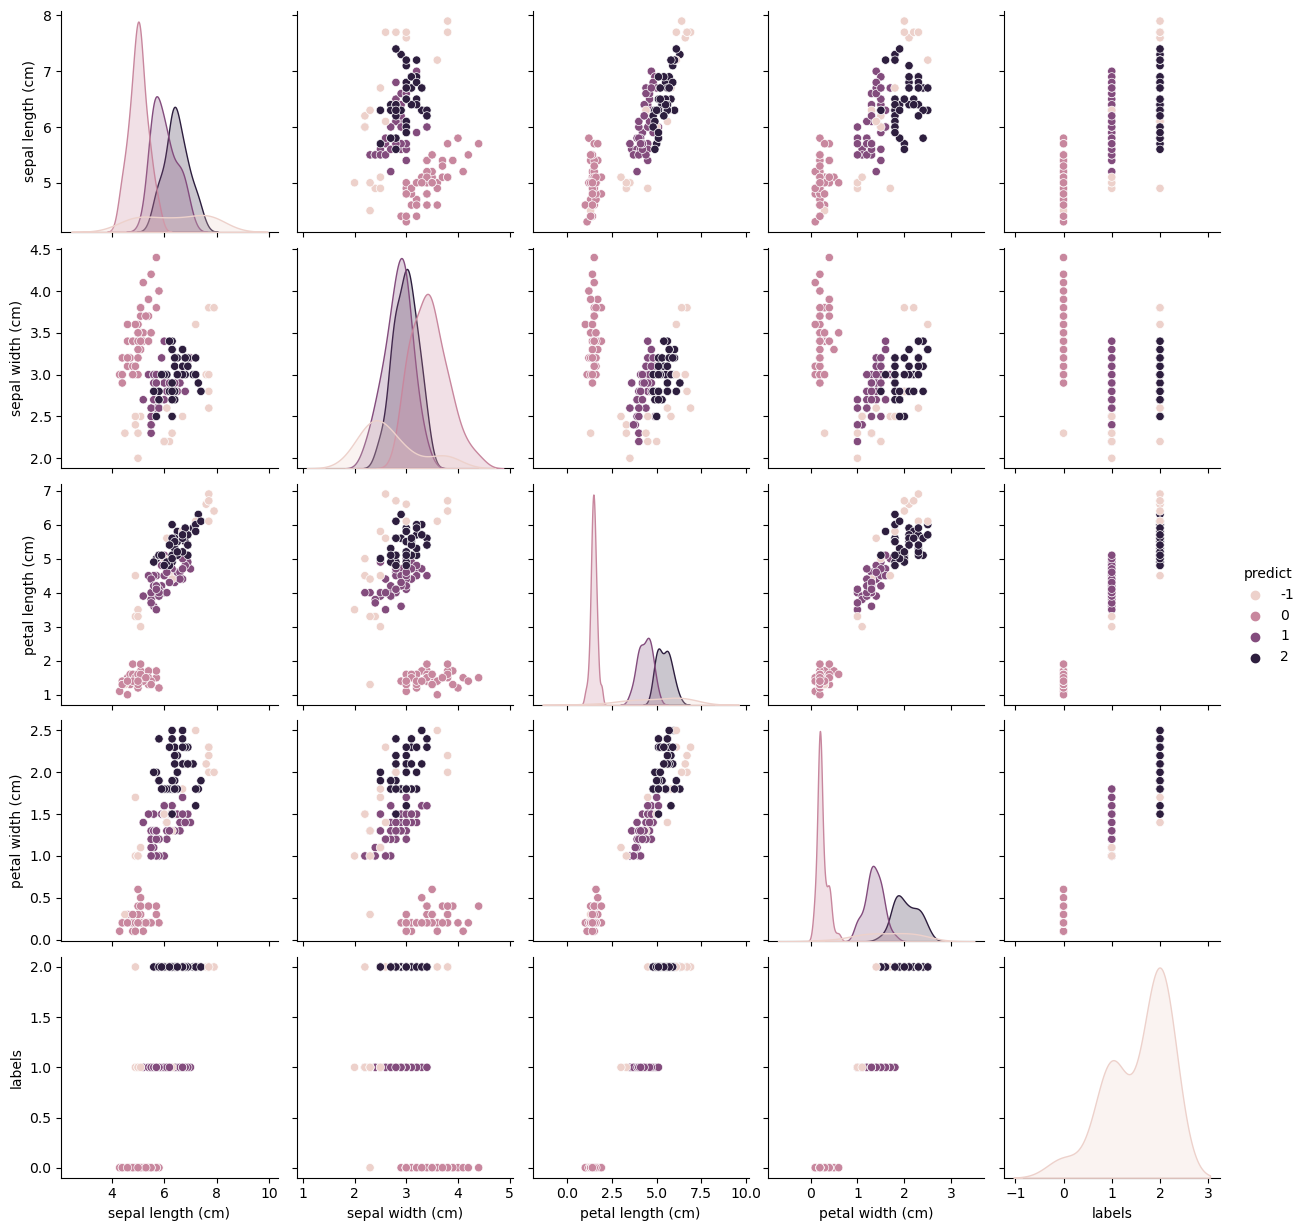

In [17]:
sns.pairplot(r, hue="predict")

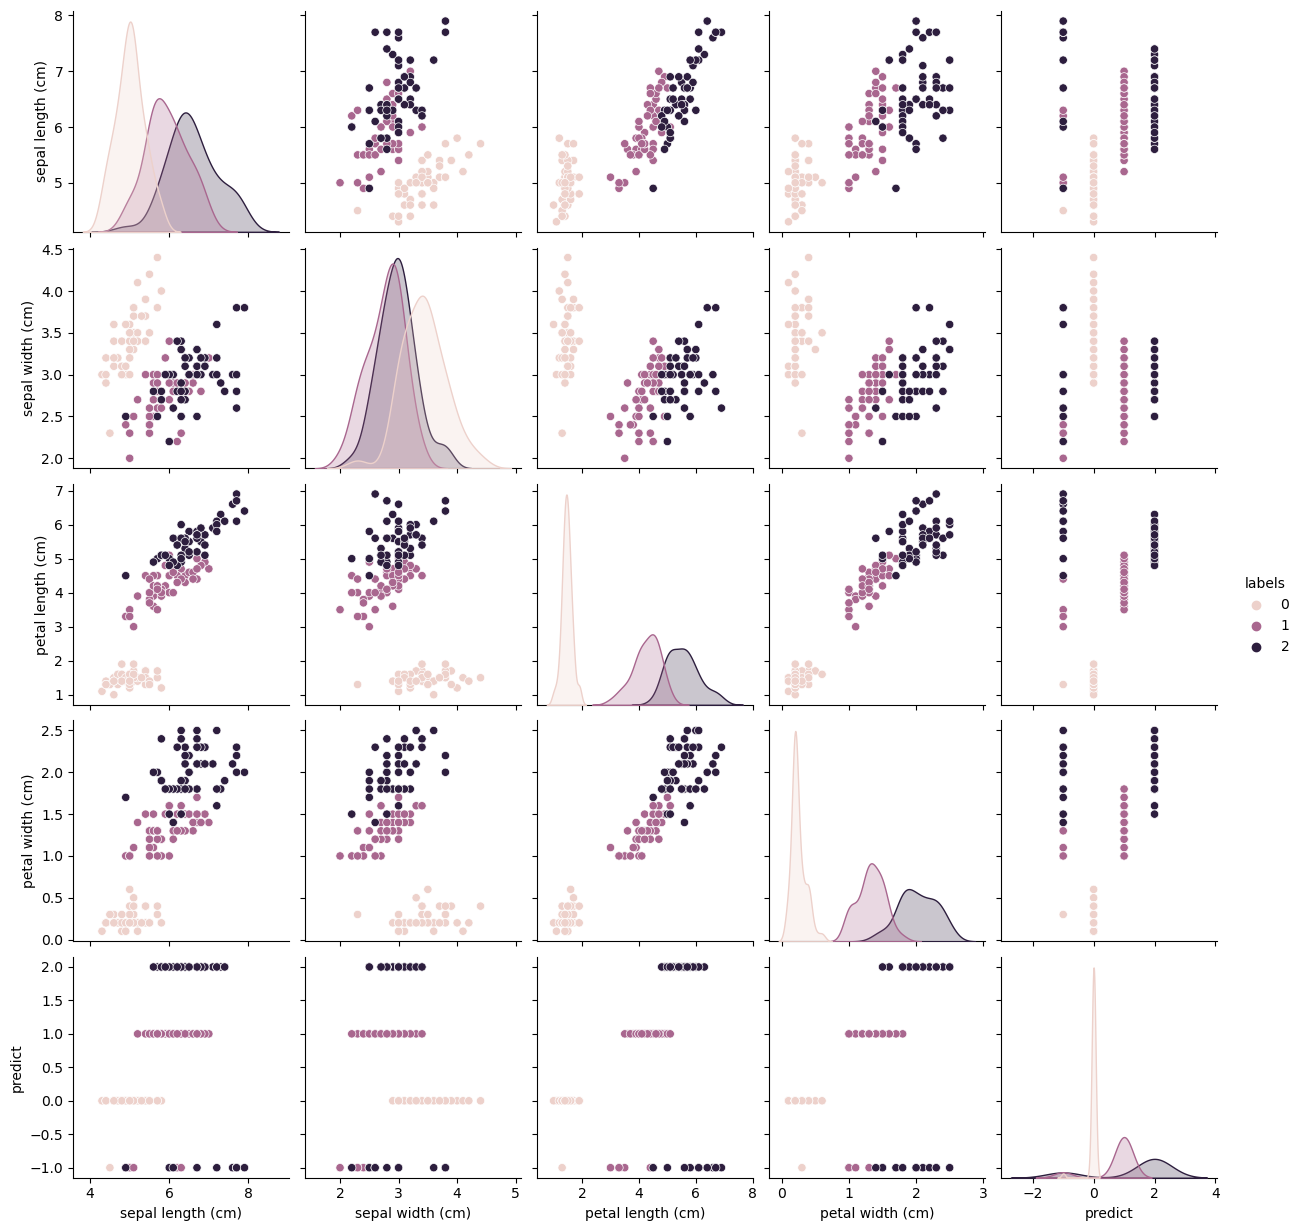

In [18]:
sns.pairplot(r, hue="labels")

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=21)
km.fit(data)

KMeans(n_clusters=3, random_state=21)

In [26]:
new_labels = pd.DataFrame(km.labels_)
new_labels.columns = ["predict"]

In [27]:
new_labels.head()

,predict
0,1
1,1
2,1
3,1
4,1


In [28]:
r2 = pd.concat([data,new_labels], axis=1)

In [30]:
r2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


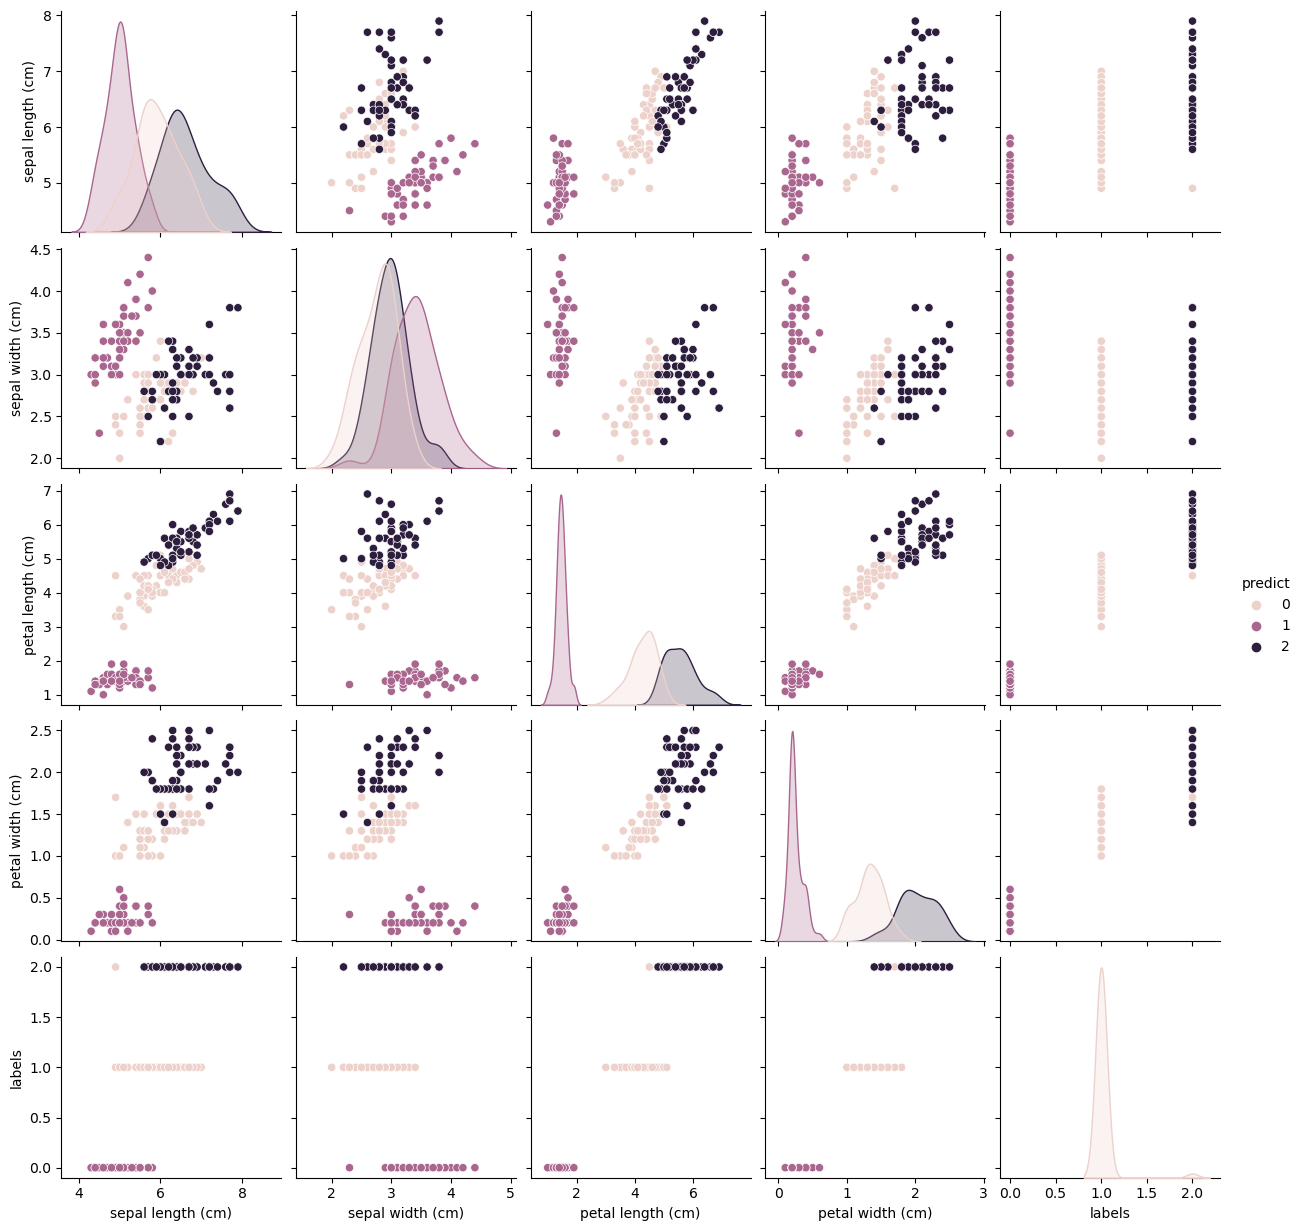

In [31]:
sns.pairplot(r2, hue="predict")